<h1><center> Analytic Report of ICPSR's General Social Survey </h1></center>

I found this data set from the link in the assignment and just kind of throwing a dart at the screen. I landed at ICPSR, and more specifically their General Social Survey, 2012 Merged Data, Including a Cultural Module.

https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/35478

ICPSR's mission statement (from their webpage): ICPSR advances and expands social and behavioral research, acting as a global leader in data stewardship and providing rich data resources and responsive educational opportunities for present and future generations. It is an international consortium of more than 750 academic institutions and research organizations. 'Inter-University Consortium for Political and Social Research.' ICPSR receives grants from government agencies and private foundations.

This specific study is the General Social Survey. From the website: The General Social Survey (GSS) collects information from the general public on a wide variety of subjects, including attitudes toward social issues, religion, education, jobs and the economy, government and other institutions, politics, and policy issues. This dataset has been downloaded almost 17,000 times, and has been used in 6 publications.

I found the extent of this survey to be very exciting. Low-bias social surveys are incredibly hard to sample, and this one seems to do as good a job as any, with an impressive response rate of 71.4%. Surveys were collected all over the U.S. The median length of the interview has been about an hour and a half. The population is all non-institutionalized English and Spanish speaking persons 18 years of age or older, living in the United States.

http://gss.norc.org/About-The-GSS


The data is 1069 variables by 4820 respondents. Not all respondents have applicable responses to each variable. Some variables have to do with the interviewer, or aspects of the survey like the mode (in person/over the phone). Many of the questions are objective things about the respondent such as age, height, or race. Most of the questions are subjective, and asking the respondent about their opinions or political and religious preferences. Some of the variables are continuous like age, but most are categorical. After exploring the data I came up with 3 questions:

<br />
<center><em>1. Is it 'better' to be trusting?<br />
2. Do there exist variables dependent on Astrological Sign?<br />
3. Can I predict if a respondent is a Born Again Christian?
    </em></center>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')
df = pd.read_csv('/Users/jdobrow/Desktop/35478-0001-Data.csv')

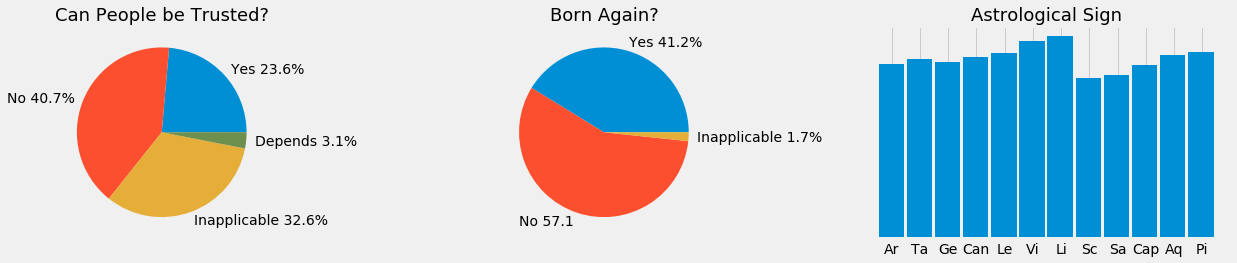

In [14]:
trust_pie = [1138, 1961, 1573, 148]
reborn_pie = [1988,2751,81]
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((2,3), (0,0))
plt.pie(trust_pie, labels=('Yes 23.6%','No 40.7%', 'Inapplicable 32.6%', 'Depends 3.1%'))
plt.title('Can People be Trusted?', fontsize=18)

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.pie(reborn_pie, labels=('Yes 41.2%', 'No 57.1', 'Inapplicable 1.7%'))
plt.title('Born Again?', fontsize=18)

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.hist(df.ZODIAC[df.ZODIAC < 98], bins=12, rwidth=.9)
plt.title('Astrological Sign', fontsize=18)
plt.yticks([])
plt.xticks(np.arange(1.47,12,.92), labels=['Ar', 'Ta', 'Ge', 'Can', 'Le', 'Vi', 'Li', 'Sc', 'Sa', 'Cap', 'Aq', 'Pi'])

plt.show()

<center><h1>
Q1. Is it Better to be Trusting?   
</h1></center>

---

<img src="http://www.differencebetween.info/sites/default/files/images/1/trust.jpg" alt="TrustFall" width="400"/>

---

<br />

<center><em>"Generally speaking, would you say that most people can be trusted or that you can't be too careful in dealing with people?"</em></center>

<br />

---

This variable piqued my interest because I find it to be a very defining aspect of people, but I didn't understand how it related to other aspects or character traits. I initially posited that to be trusting was an inherently 'good' thing. Some of the people that I was discussing this with seemed to think the opposite: Being trusting indcates naivety and is an overall negative trait.

In order to resolve this disagreement, I decided to find variables in the survey that had objectively good and bad responses, and check to see if the sample of people that were trusting were significantly different from the sample of people that were not trusting, and in which direction and with what power. I chose a list of variables and then ran a chi-square test of independence for categorical variables. For continuous variables, I first checked if they followed a normal distribution using a Shapiro-Wilk test for normality (none of them were) and then used a rank-sum test.


|<center>Variable | <center>Description | <center>Test Used|<center>Significant?| _ |<center>Variable | <center>Description | <center>Test Used|<center>Significant?|
| --- | --- | --- | ---  | --- | --- | --- | ---  | --- |
|HAPPY7|General Happiness|chi-square| No|  |  |DWELOWN|Do you own or rent your home|chi-square|Yes|
|HAPMAR|Happiness of Marriage|chi-square|No| _ |UNEMP|Ever unemployed in last 10 years|chi-square|Yes|
|MNTLHLTH|Days of poor mental health in last 30|rank-sum|No| _ |EDUC|Years of school completed|rank-sum|Yes|
|HLTHPAIN|Body pains in last 30 days|rank-sum|No| _ |CONINC|Inflation-adjust family income|rank-sum|Yes|
|PHYSACT|How often 20 min of physical activity|chi-square|No| _ |TVHOURS|Average daily hours watching TV|rank-sum|Yes|
|SMOKEDAY|Number of daily cigarettes|chi-square|No| _ |FRTVEGS|How often fresh fruit/veggies eaten|chi-square|Yes|
|DRINK4|How often 4 or more drinks in a day|chi-square|No| _ |LOCKEDUP|Have you been in prison/jail|chi-square|Yes|
|BMI|Based on Height and Weight|rank-sum|No| _ |EVIDU|Ever injected recreational drugs|chi-square|Yes|
| . | . | . | . | _ |PHYSHLTH|Days of poor physical health in last 30|rank-sum|Yes|

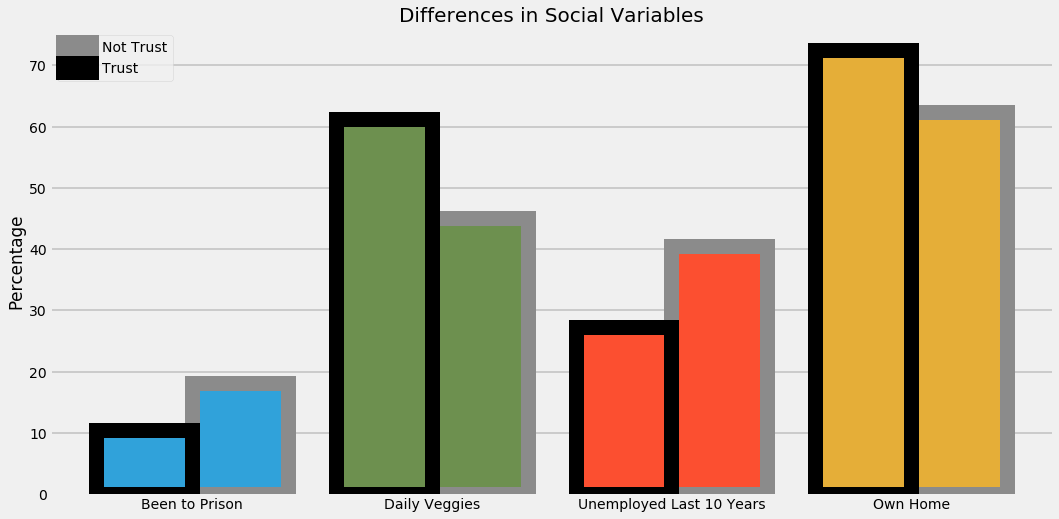

In [15]:
means_trust, means_nottrust = (10.55, 61.20, 27.29, 72.5), (18.08, 45.1, 40.46, 62.41)
fig, ax = plt.subplots(figsize=(16,8))
bar_width, opacity, n_groups = 0.4, 1, 4
index = np.arange(n_groups)

plt.grid(axis='y', linewidth=2, zorder=0)
plt.grid(b=False, axis='x')

rects2 = plt.bar(index + bar_width, means_nottrust, bar_width, zorder=3, alpha=opacity, color=('#30a2da','#6d904f', '#fc4f30','#e5ae38'), edgecolor='#8b8b8b', linewidth= '15', label='Not Trust')

rects1 = plt.bar(index, means_trust, bar_width, zorder=3, alpha=opacity, color=('#30a2da','#6d904f', '#fc4f30','#e5ae38'), edgecolor='black', linewidth = '15', label='Trust')

plt.ylabel('Percentage')
plt.title('Differences in Social Variables', fontsize=20)
plt.xticks(index + bar_width/2, ('Been to Prison', 'Daily Veggies', 'Unemployed Last 10 Years', 'Own Home'))
plt.legend(loc="upper left")
plt.show()

EVIDU is our one pesky variable that actually contradicts our posit. Respondents were asked if they have ever taken any drugs by injection with a needle not under doctor's orders.) I expected the trusting group to be less likely to have injected drugs. This is not the case, people that are more trusting are also more likely to have injected drugs and significantly so. I have a few possible explanations for this:
1. Having injected drugs is not actually a 'bad' thing. Since this question is asking about behavior over the lifetime of the respondent, it's possible that people who have injected drugs but no longer do are now healthier and wiser and therefore more trusting.
2. Being trusting is 'better' for most things but not all.
3. The respondents were lying. It is possible that respondents would not be truthful on such a taboo topic. If some percentage of the respondents were lying, it would likely be the less trusting ones that would lie, which could have biased the data into making needle abusers appear trusting.

Despite one contradiction, and an inability to conclude causation, I claim that it is better to be trusting and that this data set sufficiently supports this claim.

<center><h1> Do There Exist Variables Dependent on Astrological Sign? </h1></center>

---

<img src="https://astrostyle.com/wp-content/uploads/2017/11/history-of-astrology.png" alt="Zodiac" width="600"/>

---

I was curious if we could find a significant relationship between the respondent's astrological sign and ANY other variable from the GSS. A person's astrological sign comes from their birth day; the concept is ancient, and regarded today as pseudoscience. It is, however, a part of pop culture, and believed by many (including lots of people in my immediate environment)to be factual.

Astrological Sign is uniformly distributed in the GSS. In order to find a variable that was dependent, I attempted to run a chi-square test on a contigency table for each variable against ZODIAC (astrological sign.) Most of the variables in the GSS are categorical, and so I just had to filter out the inapplicable values to run a chi-square. Many of the variables were continuous and so I created a function to automatically convert them into a categorical variable with 3 values: Hi, Middle, and Low.

I initially set my alpha at 0.05, and found quite a few variables where I was able to reject my null hypothesis that the variables were independent. I later realized that I would need a much smaller alpha value, since about 1 in 20 variables should in theory reject the null hypothesis, which is over 50 variables in this data set. I set my alpha at 0.001 instead, which should still result in about 1 variable being dependent due to random chance.

Sure enough, one variable had a p-value from a chi-square test of 5.660984832616098e-05 after I combined two of its values: 

---

<center><h4>LIVEWHTS</h4></center>

<center><em>How in favor would you be of living in a neighborhood where half of your neighbors were whites?</em></center>


| Strong Favor | Favor | Indifferent | Oppose |
| --- | --- | --- | --- |
| 675 | 822 | 1532 | 172 |

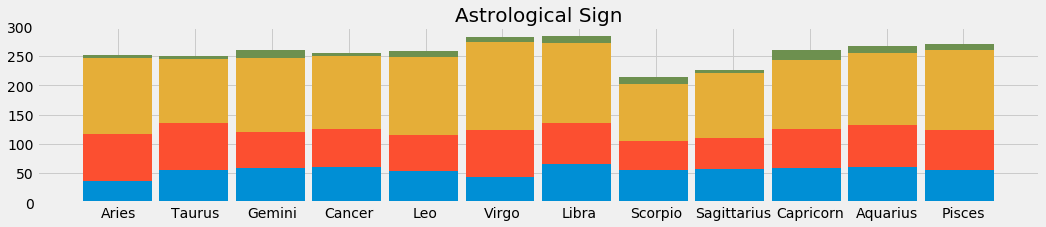

In [16]:
plt.figure(figsize=(16,3))
test_df = df[df.ZODIAC < 98]
plt.title('Astrological Sign', fontsize=20)
plt.hist([test_df.ZODIAC[test_df.LIVEWHTS==1],test_df.ZODIAC[test_df.LIVEWHTS==2],test_df.ZODIAC[test_df.LIVEWHTS==3],test_df.ZODIAC[test_df.LIVEWHTS==4]],stacked=True,bins=12, rwidth=0.9)
plt.xticks(np.arange(1.47,12,.92), labels=['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
plt.show()

Virgos appear to be unusually indifferent towards racial make-up of their neighborhood. Aries don't seem to strongly favor white neighborhoods. Scorpios and Capricorns are more likely to oppose half-white neighborhoods. Tauruses are most likely to favor or strongly favor white neighborhoods.

There are some serious flaws in my methods, mostly due to lack of tools and time. Many variables were ignored due to the unusual shape of their values. I used a function with a for loop to automatically filter inapplicable values from the variables since there were over a 1000, which is too many to go through individually. It is highly possible that some variables are dependent on astrological sign that I missed, or that I ran statistical tests on data that I should not have. All of the errors I may have made due to this would have been type II errors, which is the less harmful error in this analysis.

<center><h1>
Can I Predict 'Born Again' Experiences?
</h1></center>

---
<img src="https://fthmb.tqn.com/NsvnQPkvFtm9z1Suh_bYTtD7UgY=/christ-the-redeemer-554182873-5af903d88023b900362e4fc1.jpg" alt="Christ Redeemer" width="500"/>

---

<br />

<center><em>
Would you say you have been 'born again' or have had a 'born-again' experience, that is, a turning point in your life when you committed yourself to Christ?</em></center>

<br />

| Option | Weight |
| --- | --- |
| Yes | 41.2% |
| No | 57.1% |
| Don't know | 1.7% |

---

I was surprised when exploring this variable by the porportion of respondents that claimed to have a born-again experience in Christ, so I set out with very primitive tools to try and create a predictive model. First I created some functions to automatically determine the variable type and perform a statistical test. I then created a list of p-values and sorted it to determine which variables were most closely related to being a born-again Christian. There are over 1000 variables in the GSS, and most of them are dependent on our variable REBORN. I picked 8 variables to use in my model, and I decided to avoid variables that were explicity related to Christianity. REGION was the first variable on the list unrelated to Christiantiy.

|Variable | Description | p-value|
| --- | --- | --- |
| REGION | Region of Interview | 1.15044381655582e-73 |
| LETDIE1 | Allow incurable patients to die | 1.6178346274090465e-56|
| RACE | Race | 3.362270219359458e-54 |
| POLVIEWS | Political Lean | 1.4446099946525114e-38 |
| WORDSUM | Score on Vocab Test | 6.663527966996724e-35 |
| GRANBORN | Grandparents Born in U.S. | 1.8973086729844897e-30 |
| CONINC | Family Income |  5.509951458658787e-27 |
| EDUC | Years School Completed |  3.77693030783804e-26 |

I then compressed the values for each variable onto a 0 - 1 scale, where 1 means most likely to be a born-again Christian, and 0 is least likely. I added all 8 variables together and divided by 8 to get a new variable 'REBORNGUESS'.

---

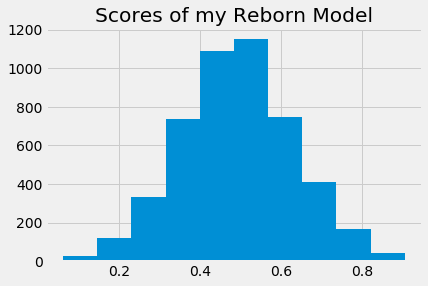

---

The model appears to be normal-ish! To test my model, I ran a quick for loop through the original dataset and had a 70% success rate. If I only look at respondents that score very high or low on my model, I have a 91% success rate. I consider this model to be a success considering the basic methods that I used. Yes, I can predict born-again experiences in the respondents.

<h1><center> Further Research </center></h1>

---

1. Improve REBORN model using machine learning techniques.
2. Learn how to better clean the data
3. How to better search for p-values for significant differences using automation, including searching for patterns in a large dataset without manually digging through and testing things. How to deal with varied types of data and number of possible values.
4. How to check if the surveyed data is biased?